## Iteration 2
1. From the Xgboost model fitted , the important features for the model are: HTAG(Half Time Away Team Goals, with importance score 47), 'HTHG (Halftime home team goals: 44) 'AST (Away team shots on target 34) , HST (home team shots on target 41)
# 
2. The model has prediction correctness of greater than 70% for home and away wins. But for draw matches the predictions are wrong.  We need to find good signals for draw matchesfor the model 

In [52]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("./train.csv")

In [5]:
df.head()

,AC,AF,AR,AS,AST,AY,AwayTeam,Date,FTR,HC,HF,HR,HS,HST,HTAG,HTHG,HY,HomeTeam,league
0,3.0,12.0,0.0,14.0,4.0,0.0,Stuttgart,07/08/09,H,6.0,12.0,0.0,13.0,7.0,0.0,0.0,0.0,Wolfsburg,bundesliga
1,1.0,10.0,0.0,7.0,0.0,1.0,FC Koln,08/08/09,H,16.0,8.0,0.0,24.0,11.0,0.0,0.0,0.0,Dortmund,bundesliga
2,3.0,20.0,0.0,15.0,3.0,2.0,Hannover,08/08/09,H,5.0,16.0,0.0,10.0,4.0,0.0,0.0,3.0,Hertha,bundesliga
3,10.0,28.0,0.0,9.0,3.0,2.0,Bayern Munich,08/08/09,D,3.0,10.0,0.0,9.0,1.0,1.0,1.0,0.0,Hoffenheim,bundesliga
4,5.0,28.0,0.0,13.0,7.0,2.0,Leverkusen,08/08/09,D,3.0,22.0,0.0,8.0,4.0,2.0,1.0,1.0,Mainz,bundesliga


In [6]:
df_cleaned = df.dropna(axis = 0, how ='any') 

In [10]:
X.head()

,AC,AF,AR,AS,AST,AY,AwayTeam,Date,HC,HF,HR,HS,HST,HTAG,HTHG,HY,HomeTeam,league
0,3.0,12.0,0.0,14.0,4.0,0.0,Stuttgart,07/08/09,6.0,12.0,0.0,13.0,7.0,0.0,0.0,0.0,Wolfsburg,bundesliga
1,1.0,10.0,0.0,7.0,0.0,1.0,FC Koln,08/08/09,16.0,8.0,0.0,24.0,11.0,0.0,0.0,0.0,Dortmund,bundesliga
2,3.0,20.0,0.0,15.0,3.0,2.0,Hannover,08/08/09,5.0,16.0,0.0,10.0,4.0,0.0,0.0,3.0,Hertha,bundesliga
3,10.0,28.0,0.0,9.0,3.0,2.0,Bayern Munich,08/08/09,3.0,10.0,0.0,9.0,1.0,1.0,1.0,0.0,Hoffenheim,bundesliga
4,5.0,28.0,0.0,13.0,7.0,2.0,Leverkusen,08/08/09,3.0,22.0,0.0,8.0,4.0,2.0,1.0,1.0,Mainz,bundesliga


In [11]:
y.head()

0    H
1    H
2    H
3    D
4    D
Name: FTR, dtype: object

In [12]:
alldrawn = df_cleaned[df_cleaned["FTR"]=='D']

In [13]:
alldrawn.head()

,AC,AF,AR,AS,AST,AY,AwayTeam,Date,FTR,HC,HF,HR,HS,HST,HTAG,HTHG,HY,HomeTeam,league
3,10.0,28.0,0.0,9.0,3.0,2.0,Bayern Munich,08/08/09,D,3.0,10.0,0.0,9.0,1.0,1.0,1.0,0.0,Hoffenheim,bundesliga
4,5.0,28.0,0.0,13.0,7.0,2.0,Leverkusen,08/08/09,D,3.0,22.0,0.0,8.0,4.0,2.0,1.0,1.0,Mainz,bundesliga
7,5.0,21.0,1.0,10.0,7.0,1.0,M'gladbach,09/08/09,D,11.0,13.0,0.0,28.0,8.0,3.0,0.0,3.0,Bochum,bundesliga
8,6.0,19.0,0.0,14.0,3.0,1.0,Hamburg,09/08/09,D,12.0,22.0,0.0,17.0,6.0,1.0,0.0,2.0,Freiburg,bundesliga
9,2.0,9.0,0.0,10.0,1.0,0.0,Werder Bremen,15/08/09,D,5.0,13.0,0.0,9.0,4.0,1.0,0.0,1.0,Bayern Munich,bundesliga


In [14]:
allnotdrawn = df_cleaned[df_cleaned["FTR"]!='D']

In [15]:
allnotdrawn.head()

,AC,AF,AR,AS,AST,AY,AwayTeam,Date,FTR,HC,HF,HR,HS,HST,HTAG,HTHG,HY,HomeTeam,league
0,3.0,12.0,0.0,14.0,4.0,0.0,Stuttgart,07/08/09,H,6.0,12.0,0.0,13.0,7.0,0.0,0.0,0.0,Wolfsburg,bundesliga
1,1.0,10.0,0.0,7.0,0.0,1.0,FC Koln,08/08/09,H,16.0,8.0,0.0,24.0,11.0,0.0,0.0,0.0,Dortmund,bundesliga
2,3.0,20.0,0.0,15.0,3.0,2.0,Hannover,08/08/09,H,5.0,16.0,0.0,10.0,4.0,0.0,0.0,3.0,Hertha,bundesliga
5,6.0,21.0,0.0,9.0,5.0,1.0,Schalke 04,08/08/09,A,9.0,14.0,0.0,14.0,3.0,1.0,0.0,2.0,Nurnberg,bundesliga
6,3.0,20.0,0.0,15.0,8.0,2.0,Ein Frankfurt,08/08/09,A,9.0,18.0,1.0,22.0,10.0,2.0,2.0,1.0,Werder Bremen,bundesliga


In [17]:
df_cleaned['isDraw'] = df_cleaned['FTR'].apply(lambda x: '**' if x == 'D' 'Y' else 'N')


/home/srimugunthan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
df_cleaned[df_cleaned['isDraw'] == 'N']

,AC,AF,AR,AS,AST,AY,AwayTeam,Date,FTR,HC,HF,HR,HS,HST,HTAG,HTHG,HY,HomeTeam,league,isDraw
0,3.0,12.0,0.0,14.0,4.0,0.0,Stuttgart,07/08/09,H,6.0,12.0,0.0,13.0,7.0,0.0,0.0,0.0,Wolfsburg,bundesliga,N
1,1.0,10.0,0.0,7.0,0.0,1.0,FC Koln,08/08/09,H,16.0,8.0,0.0,24.0,11.0,0.0,0.0,0.0,Dortmund,bundesliga,N
2,3.0,20.0,0.0,15.0,3.0,2.0,Hannover,08/08/09,H,5.0,16.0,0.0,10.0,4.0,0.0,0.0,3.0,Hertha,bundesliga,N
5,6.0,21.0,0.0,9.0,5.0,1.0,Schalke 04,08/08/09,A,9.0,14.0,0.0,14.0,3.0,1.0,0.0,2.0,Nurnberg,bundesliga,N
6,3.0,20.0,0.0,15.0,8.0,2.0,Ein Frankfurt,08/08/09,A,9.0,18.0,1.0,22.0,10.0,2.0,2.0,1.0,Werder Bremen,bundesliga,N
11,6.0,13.0,0.0,20.0,9.0,0.0,Wolfsburg,15/08/09,A,4.0,17.0,0.0,13.0,6.0,0.0,0.0,1.0,FC Koln,bundesliga,N
12,3.0,17.0,0.0,12.0,4.0,1.0,Dortmund,15/08/09,H,10.0,16.0,0.0,18.0,9.0,1.0,3.0,0.0,Hamburg,bundesliga,N
14,2.0,22.0,0.0,3.0,2.0,2.0,Hoffenheim,15/08/09,H,6.0,20.0,0.0,14.0,5.0,0.0,0.0,3.0,Leverkusen,bundesliga,N
15,5.0,23.0,0.0,13.0,5.0,3.0,Freiburg,15/08/09,H,3.0,10.0,0.0,13.0,5.0,0.0,0.0,2.0,Stuttgart,bundesliga,N
16,5.0,12.0,0.0,21.0,6.0,2.0,Hertha,16/08/09,H,7.0,9.0,0.0,20.0,9.0,0.0,1.0,2.0,M'gladbach,bundesliga,N


# engineer some new features

In [177]:
df_cleaned.loc[df_cleaned['FTR']=='D','isDraw'] = 'Y'
df_cleaned.loc[df_cleaned['FTR']!='D','isDraw'] = 'N'

/home/srimugunthan/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [134]:
df_cleaned.head()

,AC,AF,AR,AS,AST,AY,AwayTeam,Date,FTR,HC,...,year,HomeAwayteam,drawpred,diffHaltimeGoals,diffShots,diffShotsOnTarget,diffCorners,diffFouls,diffYcards,diffRCards
0,3.0,12.0,0.0,14.0,4.0,0.0,Stuttgart,07/08/09,H,6.0,...,2009,Wolfsburg-X-Stuttgart,Y,0.0,1.0,3.0,3.0,0.0,0.0,0.0
1,1.0,10.0,0.0,7.0,0.0,1.0,FC Koln,08/08/09,H,16.0,...,2009,Dortmund-X-FC Koln,Y,0.0,17.0,11.0,15.0,2.0,1.0,0.0
2,3.0,20.0,0.0,15.0,3.0,2.0,Hannover,08/08/09,H,5.0,...,2009,Hertha-X-Hannover,Y,0.0,5.0,1.0,2.0,4.0,1.0,0.0
3,10.0,28.0,0.0,9.0,3.0,2.0,Bayern Munich,08/08/09,D,3.0,...,2009,Hoffenheim-X-Bayern Munich,Y,0.0,0.0,2.0,7.0,18.0,2.0,0.0
4,5.0,28.0,0.0,13.0,7.0,2.0,Leverkusen,08/08/09,D,3.0,...,2009,Mainz-X-Leverkusen,Y,1.0,5.0,3.0,2.0,6.0,1.0,0.0


In [133]:
df_cleaned["diffHaltimeGoals"] = abs(df_cleaned["HTAG"]-df_cleaned["HTHG"])
df_cleaned["diffShots"] = abs(df_cleaned["AS"]-df_cleaned["HS"])
df_cleaned["diffShotsOnTarget"] =  abs(df_cleaned["AST"]-df_cleaned["HST"])
df_cleaned["diffCorners"] =  abs(df_cleaned["AC"]-df_cleaned["HC"])

df_cleaned["diffFouls"] =  abs(df_cleaned["AF"]-df_cleaned["HF"])
df_cleaned["diffYcards"] =  abs(df_cleaned["AY"]-df_cleaned["HY"])
df_cleaned["diffRCards"] =  abs(df_cleaned["AR"]-df_cleaned["AR"])

/home/srimugunthan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/srimugunthan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/srimugunthan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [137]:
df_cleaned['HomeAwayteam']=df_cleaned['HomeTeam'] + "-X-"+ df_cleaned['AwayTeam']

/home/srimugunthan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [140]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = df_cleaned.isDraw
X= df_cleaned.drop("isDraw",axis=1)
X["AwayTeamEnc"] = le.fit_transform(X["AwayTeam"].astype(str))
X["HomeTeamEnc"] = le.fit_transform(X["HomeTeam"].astype(str))
X["leagueEnc"] = le.fit_transform(X["league"].astype(str))
X["HomeAwayteamEnc"] = le.fit_transform(X["HomeAwayteam"].astype(str))
X= X.drop("AwayTeam", axis=1)
X=X.drop("HomeTeam", axis=1)
X= X.drop("league", axis=1)
X= X.drop("FTR", axis=1)
X= X.drop("Date", axis=1)
X= X.drop("HomeAwayteam", axis=1)


# data exploration

isDraw               N     Y
diffHaltimeGoals            
0.0               3343  2044
1.0               4200  1108
2.0               1529   122
3.0                345     7
4.0                 65     1
5.0                 12     0


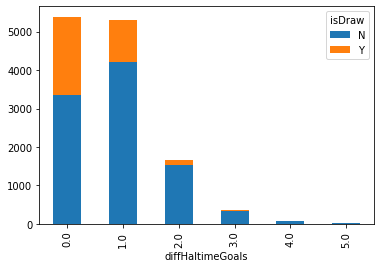

In [178]:
data_crosstab = pd.crosstab(df_cleaned['diffHaltimeGoals'],  
                            df_cleaned['isDraw'], 
                                margins = False) 
print(data_crosstab) 
data_crosstab.plot.bar(stacked=True)
plt.legend(title='isDraw')

plt.show()

In [50]:
data_crosstab = pd.crosstab(df_cleaned['AR'],  
                            df_cleaned['isDraw'], 
                                margins = False) 
print(data_crosstab) 

isDraw     N     Y
AR                
0.0     8261  2861
1.0     1121   403
2.0      107    17
3.0        5     1


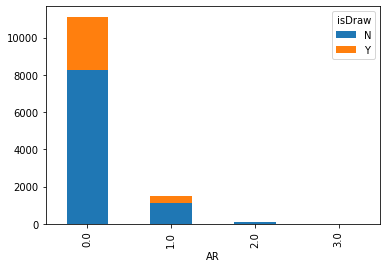

In [53]:

data_crosstab.plot.bar(stacked=True)
plt.legend(title='isDraw')

plt.show()

In [54]:
data_crosstab = pd.crosstab(df_cleaned['HTAG'],  
                            df_cleaned['isDraw'], 
                                margins = False) 
print(data_crosstab) 

isDraw     N     Y
HTAG              
0.0     5763  2065
1.0     2776  1037
2.0      771   164
3.0      154    14
4.0       23     2
5.0        7     0


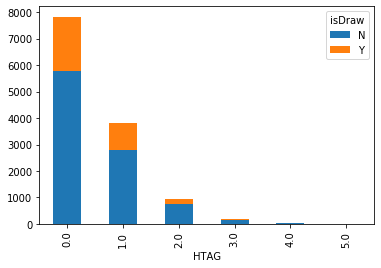

In [55]:
data_crosstab.plot.bar(stacked=True)
plt.legend(title='isDraw')

plt.show()

In [56]:
data_crosstab = pd.crosstab(df_cleaned['HTHG'],  
                            df_cleaned['isDraw'], 
                                margins = False) 
print(data_crosstab) 

isDraw     N     Y
HTHG              
0.0     4395  2007
1.0     3334  1102
2.0     1346   159
3.0      347    12
4.0       61     2
5.0       11     0


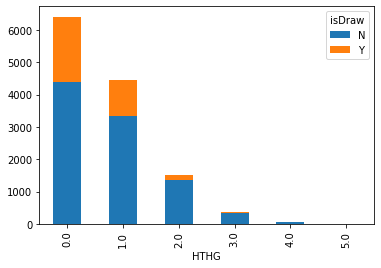

In [57]:
data_crosstab.plot.bar(stacked=True)
plt.legend(title='isDraw')

plt.show()

### Look at league if it has a correlation to drawn matches

In [60]:
alldrawn.league.unique()

array(['bundesliga', 'la-liga', 'ligue-1', 'premier-league', 'serie-a'],
      dtype=object)

In [61]:
allnotdrawn.league.unique()

array(['bundesliga', 'la-liga', 'ligue-1', 'premier-league', 'serie-a'],
      dtype=object)

isDraw             N    Y
league                   
bundesliga      1609  533
la-liga         2036  624
ligue-1         1924  733
premier-league  1968  692
serie-a         1957  700


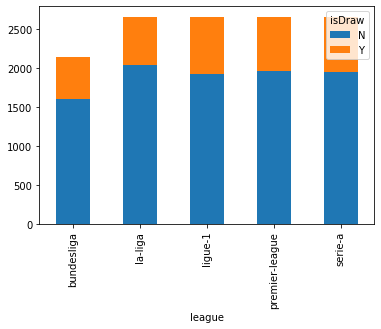

In [71]:
data_crosstab = pd.crosstab(df_cleaned['league'],  
                            df_cleaned['isDraw'], 
                                margins = False) 
print(data_crosstab) 
data_crosstab.plot.bar(stacked=True)
plt.legend(title='isDraw')

plt.show()

### Look at Date if it has a correlation to drawn matches

In [65]:
len(alldrawn.Date.unique())

864

In [64]:
len(allnotdrawn.Date.unique())

1148

In [74]:
df_cleaned['month']=pd.DatetimeIndex(df_cleaned['Date']).month
df_cleaned['day']=pd.DatetimeIndex(df_cleaned['Date']).day
df_cleaned['year']=pd.DatetimeIndex(df_cleaned['Date']).year


/home/srimugunthan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/srimugunthan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/srimugunthan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [75]:
df_cleaned.head()

,AC,AF,AR,AS,AST,AY,AwayTeam,Date,FTR,HC,...,HST,HTAG,HTHG,HY,HomeTeam,league,isDraw,month,day,year
0,3.0,12.0,0.0,14.0,4.0,0.0,Stuttgart,07/08/09,H,6.0,...,7.0,0.0,0.0,0.0,Wolfsburg,bundesliga,N,7,8,2009
1,1.0,10.0,0.0,7.0,0.0,1.0,FC Koln,08/08/09,H,16.0,...,11.0,0.0,0.0,0.0,Dortmund,bundesliga,N,8,8,2009
2,3.0,20.0,0.0,15.0,3.0,2.0,Hannover,08/08/09,H,5.0,...,4.0,0.0,0.0,3.0,Hertha,bundesliga,N,8,8,2009
3,10.0,28.0,0.0,9.0,3.0,2.0,Bayern Munich,08/08/09,D,3.0,...,1.0,1.0,1.0,0.0,Hoffenheim,bundesliga,Y,8,8,2009
4,5.0,28.0,0.0,13.0,7.0,2.0,Leverkusen,08/08/09,D,3.0,...,4.0,2.0,1.0,1.0,Mainz,bundesliga,Y,8,8,2009


isDraw     N    Y
month            
1        947  359
2        920  301
3        815  272
4        997  347
5        711  210
6        323  122
7        306  120
8        783  294
9        996  350
10      1026  323
11       871  302
12       799  282


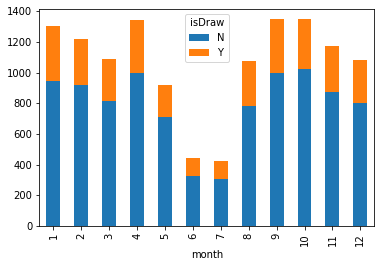

In [79]:
data_crosstab = pd.crosstab(df_cleaned['month'],  
                            df_cleaned['isDraw'], 
                                margins = False) 
print(data_crosstab) 
data_crosstab.plot.bar(stacked=True)
plt.legend(title='isDraw')

plt.show()

isDraw     N    Y
year             
2009     643  209
2010    1330  502
2011    1331  485
2012    1397  469
2013     685  250
2014     619  232
2015    1378  467
2016    1359  452
2017     752  216


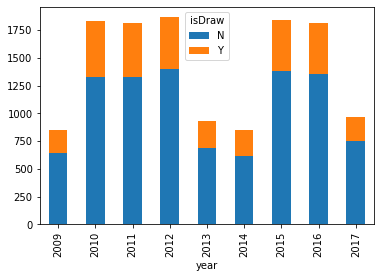

In [80]:
data_crosstab = pd.crosstab(df_cleaned['year'],  
                            df_cleaned['isDraw'], 
                                margins = False) 
print(data_crosstab) 
data_crosstab.plot.bar(stacked=True)
plt.legend(title='isDraw')

plt.show()

isDraw    N    Y
day             
1       266   89
2       468  172
3       438  163
4       512  175
5       470  163
6         8    2
8        65   25
9       189   61
10      242   97
11      373  131
12      470  166
13      325  126
14      280   89
15      304   99
16      293   96
17      341  109
18      332  100
19      325  122
20      422  132
21      411  152
22      332  134
23      326  105
24      299  109
25      278   91
26      320  110
27      279   98
28      329  114
29      312   95
30      309   82
31      176   75


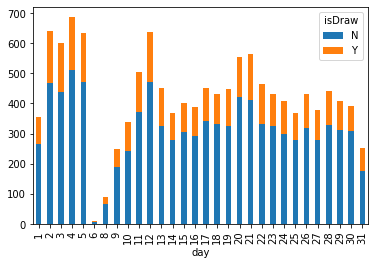

In [81]:
data_crosstab = pd.crosstab(df_cleaned['day'],  
                            df_cleaned['isDraw'], 
                                margins = False) 
print(data_crosstab) 
data_crosstab.plot.bar(stacked=True)
plt.legend(title='isDraw')

plt.show()

# Feature selection

In [150]:
X= X.drop("drawpred", axis=1)

In [31]:
y = le.fit_transform(df_cleaned.FTR)
classlabels = le.classes_

In [144]:
y = le.fit_transform(df_cleaned.isDraw)
drawlabels =  le.classes_

In [32]:
import numpy as np

In [59]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

# Summarize scores
np.set_printoptions(precision=0)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

[2.e+00 4.e+01 2.e+02 1.e+03 2.e+03 3.e+01 3.e+01 4.e+01 2.e+02 7.e+02
 2.e+03 2.e+03 2.e+03 1.e+02 8.e+01 8.e+00 4.e+00]
[[ 4.  7.  0.  0.]
 [ 0. 11.  0.  0.]
 [ 3.  4.  0.  0.]
 [ 3.  1.  1.  1.]
 [ 7.  4.  2.  1.]]


In [34]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [165]:
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 10)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

/home/srimugunthan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/srimugunthan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/srimugunthan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/srimugunthan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/srimugunthan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default so

Num Features: 10
Selected Features: [False False  True False False  True  True False  True False  True  True
  True False False False False  True  True  True False False False False
 False False False False]
Feature Ranking: [ 4  9  1 11  3  1  1 10  1 12  1  1  1  7 18 13 17  1  1  1  5  8  6 19
 16 14  2 15]


/home/srimugunthan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/srimugunthan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/srimugunthan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [166]:
fit.support_

array([False, False,  True, False, False,  True,  True, False,  True,
       False,  True,  True,  True, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False])

In [167]:
X.columns

Index(['AC', 'AF', 'AR', 'AS', 'AST', 'AY', 'HC', 'HF', 'HR', 'HS', 'HST',
       'HTAG', 'HTHG', 'HY', 'month', 'day', 'year', 'diffHaltimeGoals',
       'diffShots', 'diffShotsOnTarget', 'diffCorners', 'diffFouls',
       'diffYcards', 'diffRCards', 'AwayTeamEnc', 'HomeTeamEnc', 'leagueEnc',
       'HomeAwayteamEnc'],
      dtype='object')

In [168]:
list_of_tuples = list(zip(X.columns, fit.support_))  

In [169]:
temp = pd.DataFrame(list_of_tuples, columns = ['Feature', 'Selected'])  

In [170]:
temp

,Feature,Selected
0,AC,False
1,AF,False
2,AR,True
3,AS,False
4,AST,False
5,AY,True
6,HC,True
7,HF,False
8,HR,True
9,HS,False


In [172]:
selectedf = temp[temp["Selected"] == True]

In [176]:
np.array(selectedf['Feature'])

array(['AR', 'AY', 'HC', 'HR', 'HST', 'HTAG', 'HTHG', 'diffHaltimeGoals',
       'diffShots', 'diffShotsOnTarget'], dtype=object)

# Logistic regression model

In [180]:
X_log_reg = df_cleaned[np.array(selectedf['Feature'])]

In [181]:
X_log_reg.head()

,AR,AY,HC,HR,HST,HTAG,HTHG,diffHaltimeGoals,diffShots,diffShotsOnTarget
0,0.0,0.0,6.0,0.0,7.0,0.0,0.0,0.0,1.0,3.0
1,0.0,1.0,16.0,0.0,11.0,0.0,0.0,0.0,17.0,11.0
2,0.0,2.0,5.0,0.0,4.0,0.0,0.0,0.0,5.0,1.0
3,0.0,2.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0
4,0.0,2.0,3.0,0.0,4.0,2.0,1.0,1.0,5.0,3.0


In [186]:

y = le.fit_transform(df_cleaned.isDraw)
classlabels = le.classes_

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X_log_reg, y, random_state=42, stratify=y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape,

((9582, 10), (9582,), (3194, 10), (3194,))

In [189]:
from sklearn.linear_model import LogisticRegression
lmodel = LogisticRegression(solver = 'lbfgs')
lmodel.fit(X_train, y_train)
l_y_pred  = lmodel.predict(X_test)
l_y_pred_prob  = lmodel.predict_proba(X_test)

In [190]:
logisticreg_accuracy = accuracy_score(y_test, l_y_pred)
logisticreg_logloss = log_loss(y_test, l_y_pred_prob)

In [191]:
print(logisticreg_accuracy)

0.7417031934877896


In [193]:
import pickle
filename = 'lreg_model.sav'
pickle.dump(lmodel, open(filename, 'wb'))

# RandomForest model

In [82]:
df_cleaned['HomeAwayteam']=df_cleaned['HomeTeam'] + "-X-"+ df_cleaned['AwayTeam']

/home/srimugunthan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [83]:
df_cleaned.head()

,AC,AF,AR,AS,AST,AY,AwayTeam,Date,FTR,HC,...,HTAG,HTHG,HY,HomeTeam,league,isDraw,month,day,year,HomeAwayteam
0,3.0,12.0,0.0,14.0,4.0,0.0,Stuttgart,07/08/09,H,6.0,...,0.0,0.0,0.0,Wolfsburg,bundesliga,N,7,8,2009,Wolfsburg-X-Stuttgart
1,1.0,10.0,0.0,7.0,0.0,1.0,FC Koln,08/08/09,H,16.0,...,0.0,0.0,0.0,Dortmund,bundesliga,N,8,8,2009,Dortmund-X-FC Koln
2,3.0,20.0,0.0,15.0,3.0,2.0,Hannover,08/08/09,H,5.0,...,0.0,0.0,3.0,Hertha,bundesliga,N,8,8,2009,Hertha-X-Hannover
3,10.0,28.0,0.0,9.0,3.0,2.0,Bayern Munich,08/08/09,D,3.0,...,1.0,1.0,0.0,Hoffenheim,bundesliga,Y,8,8,2009,Hoffenheim-X-Bayern Munich
4,5.0,28.0,0.0,13.0,7.0,2.0,Leverkusen,08/08/09,D,3.0,...,2.0,1.0,1.0,Mainz,bundesliga,Y,8,8,2009,Mainz-X-Leverkusen


In [194]:
X_rf = df_cleaned[np.array(selectedf['Feature'])]

In [195]:
y = le.fit_transform(df_cleaned.isDraw)
classlabels = le.classes_

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X_rf, y, random_state=42, stratify=y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape,

((9582, 10), (9582,), (3194, 10), (3194,))

In [197]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

In [198]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [199]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7207263619286162


In [200]:
import pickle
filename = 'rf_model2.sav'
pickle.dump(clf, open(filename, 'wb'))

In [201]:
classlabels

array(['N', 'Y'], dtype=object)